<a href="https://colab.research.google.com/github/dmika1234/ml_uwr_22/blob/develop/Assignments/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 2 - Dominik Mika

## Important notes

**Submission deadline:**
**lab session in the week of 17-21 of October 2022**

**Points: 1+3+1=5**

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please write on Teams about any problems with it --- we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

## Discovering MNIST data

In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
# !pip install -q gdown httpimport
# ![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

import numpy as np
with np.load('mnist.npz') as data:
    X_base = data['train_data'].astype(float)
    y_base = data['train_labels']


In [2]:
X = X_base[:60000]
y = y_base[:60000]

In [3]:
import matplotlib.pyplot as plt

def plot_digit(x):
    fig = plt.figure(figsize = (2,2))
    plt.imshow(x, cmap='gray')
    plt.show()


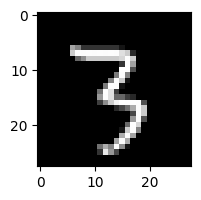

Label: 3


In [4]:
plot_digit(X[44])
print("Label:", y[44])

This image is of size $28 \times 28$ and the corresponding matrix is:

In [6]:
X[44]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

The above doesn't really look like an image anymore. Although --- just a note --- the below still reasonably represents 3.

In [7]:
for r in range(28):
    for c in range(28):
        print(1 if X[44,r,c] > 0 else 0, end="")
    print()

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000001111111111000000000000
0000001111111111110000000000
0000000111111111110000000000
0000000000000001110000000000
0000000000000001110000000000
0000000000000011100000000000
0000000000000111100000000000
0000000000001111000000000000
0000000000011110000000000000
0000000000011111110000000000
0000000000011111111100000000
0000000000000011111100000000
0000000000000000011100000000
0000000000000000011100000000
0000000000000000111000000000
0000000000000001111000000000
0000000000000001110000000000
0000000000000011100000000000
0000000000011111100000000000
0000000000011110000000000000
0000000000000000000000000000
0000000000000000000000000000


### Problem 1: center of mass [1p]

For an image as above it's quite easy to compute the center of mass: add pairwise all the coordinates for every cell which has 1 and divide by the number of cells with 1.

In [6]:
def mass_center(image):
    x = image
    x[x > 0] = 1
    ones_indx = np.array(np.where(x > 0))
    res = ones_indx.mean(axis=1)
    return tuple(res)

In [7]:
mass_center(X[44])

(13.933333333333334, 13.895238095238096)

In [8]:
centers_list = list()
for i in range(X.shape[0]):
    centers_list.append(mass_center(X[i]))
centers = np.asarray(centers_list)

In [12]:
centers

array([[13.78915663, 13.6686747 ],
       [13.55113636, 13.93181818],
       [13.69166667, 13.76666667],
       ...,
       [14.31617647, 14.20588235],
       [13.60689655, 14.66896552],
       [13.95104895, 14.        ]])

### Problem 2: plot the distributions [3p]

Create a scatter plot of the centers. Use any plotting library you want, e.g., matplotlib or plotly. In the below I've used plotly, and try to reproduce a plot similar to the one below.

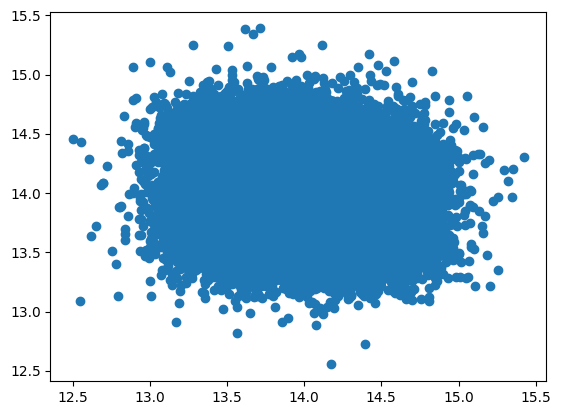

In [16]:
plt.scatter(centers[:,0], centers[:,1])
plt.show()

As we can see the MNIST dataset is so nicely preprocessed that all images have a center of mass almost in the very center. 
In fact one can even argue that the above distribution is similar to a two dimensional Gaussian distribution. Let's try to verify it.

First let us plot a histogram for each axis separately.

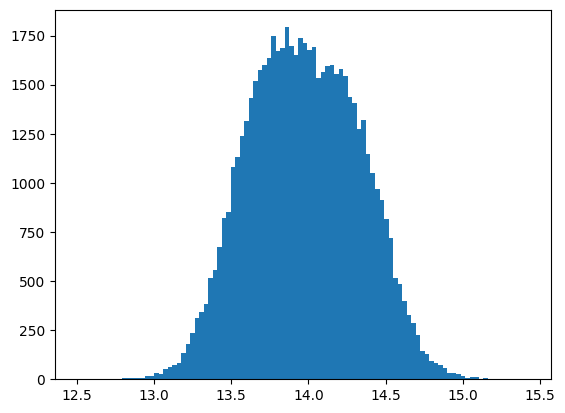

In [24]:
plt.hist(centers[:,0], bins=100)
plt.show()

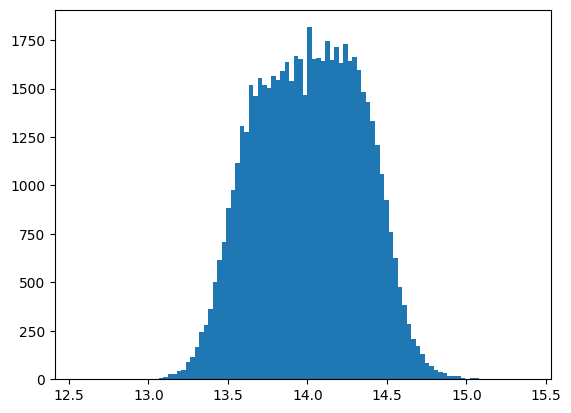

In [25]:
plt.hist(centers[:,1], bins=100)
plt.show()

Looks like a bell curve. But let us try to compare `centers[:,0]` with an appropriate normal distribution with the same mean and standard deviation.

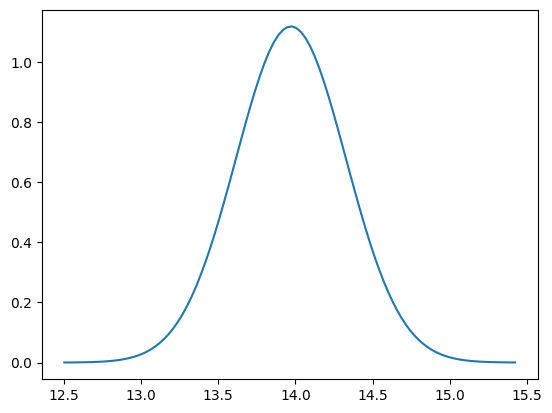

In [27]:
import scipy.stats


normal_distribution_0 = scipy.stats.norm(loc=np.mean(centers[:,0]), scale=np.std(centers[:,0]))

x = np.linspace(min(centers[:,0]),max(centers[:,0]),num=100)
y = normal_distribution_0.pdf(x)

plt.plot(x,y)


Let's plot the two on one image.

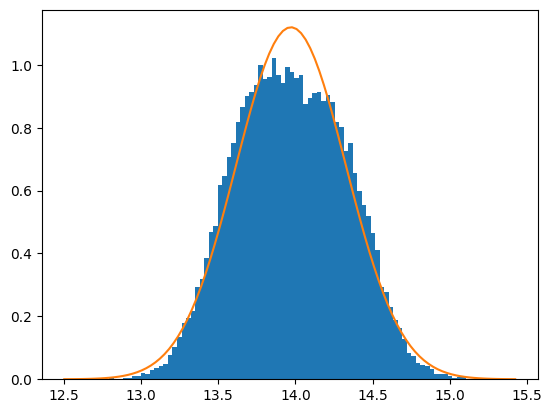

In [41]:
plt.hist(centers[:,0], bins=100, density=True)
plt.plot(x,y)
plt.show()

Let's do the same for `centers[:,1]`

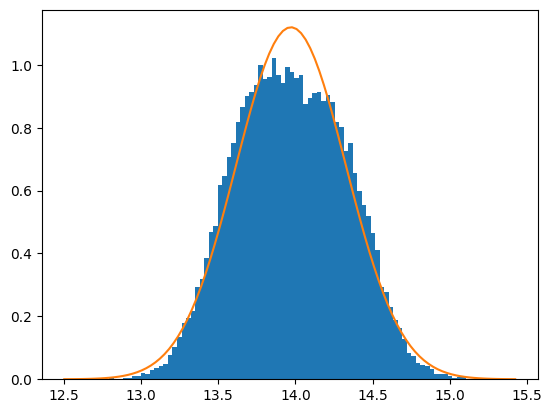

In [42]:
plt.hist(centers[:,0], bins=100, density=True)
plt.plot(x,y)
plt.show()

## Testing sampleset vs normal distribution

From this plot we may already see that the distributions of `centers[:,0]` and `centers[:,1]`, even though similar and both looking somehow like a bell, are not in fact normal. But let's verify it rigorously with an appropriate test.

In [44]:
from scipy import stats

k, p = stats.normaltest(centers[:,0])
p

1.7012471806415517e-188

In [46]:
k, p = stats.normaltest(centers[:,1])
p

0.0

The p-value is quite small, so it means that we can reject the hypothesis that the distributions are normal, even though the initial histograms were tempting to suggest that they were.

## Testing two samplesets against each other

In this section we are going to perform some measurements comparing two different samplesets.

We already have seen that the coordinates of the centers, in fact have some underlying distributions, but they are not normal. 
Question is however: can we say that distributions of `centers[:,0]` and `centers[:,1]` are the same? And what are the tools for it?

Let's also generate samples from a normal distribution with mean and std of `centers[:,0]` just for comparison

In [56]:
norm0 = scipy.stats.norm(loc=np.mean(centers[:,0]), scale=np.std(centers[:,0])).rvs(len(centers))
norm0.shape


(60000,)

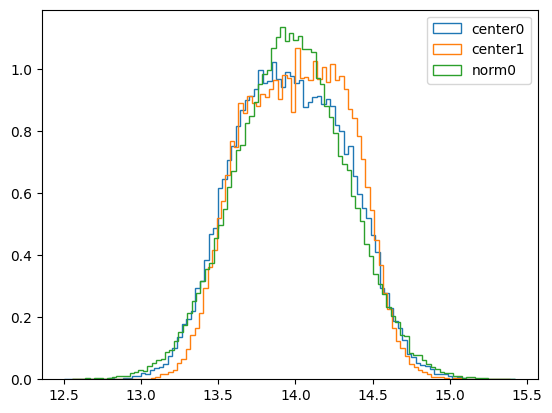

In [54]:
plt.hist(centers[:,0], 100, density=True, histtype='step', label='center0')
plt.hist(centers[:,1], 100, density=True, histtype='step', label='center1')
plt.hist(norm0, 100, density=True, histtype='step', label='norm0')
plt.legend()
plt.show()

### Problem 3: cummulative distribution function

The above plot represents empirical probability density functions of `centers[:,0]`, `centers[:,1]` and `norm0`.
Below plot empirical cummulative distribution function of these empirical distributions.

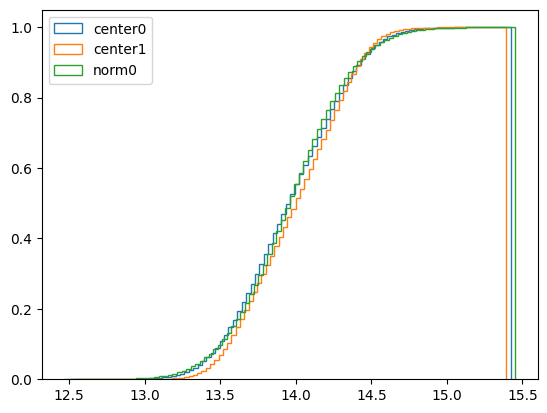

In [62]:
plt.hist(centers[:,0], 100, density=True, histtype='step', label='center0', cumulative=1)
plt.hist(centers[:,1], 100, density=True, histtype='step', label='center1', cumulative=1)
plt.hist(norm0, 100, density=True, histtype='step', label='norm0', cumulative=1)
plt.legend(loc=2)
plt.show()

The above plot suggests that the cummulative distribution functions are quite similar. However, even though they may seem so, the difference between them is big enough, so that we can state with statistical significance that the samplesets `center[:,0]` and `center[:,1]` are coming from different distributions. `center[:,0]` and `norm0` as well for that matter. 

The way to state it is the so called Kolmogorov-Smirnoff test. For two samplesets $S_1$ and $S_2$ it takes their empirical cummulative distribution functions $F_{S_1}(x)$ and $F_{S_2}(x)$ and computes the so called Kolmogorov–Smirnov statistic $D = \max_{x} \left| F_{S_1}(x) - F_{S_2}(x)\right|$. If the statistic $D$ is appropriately big (depending on the number of samples), then we reject the hypothesis that the source distributions are identical.

In [22]:
from scipy import stats
scipy.stats.kstest(centers[:,0], centers[:,1])

KstestResult(statistic=0.04776666666666668, pvalue=6.351154164146015e-60)

In [23]:
scipy.stats.kstest(centers[:,0], norm0)

KstestResult(statistic=0.024783333333333324, pvalue=1.9355816690796228e-16)

$p$-values in both tests are very small, so we can reject the hypothesis that the distributions are identical.

## A positive example

One can wonder how the above reasoning would look like if the samplesets would be coming from actually the same distributions.
Let's find out.
The simplest way of getting samples from the same distribution is to partition a given sampleset randomly into two.

In [24]:
import sklearn.model_selection
S1, S2 = sklearn.model_selection.train_test_split(centers[:,0], test_size=0.5)

In [25]:
centers[:,0].shape, S1.shape, S2.shape

((60000,), (30000,), (30000,))

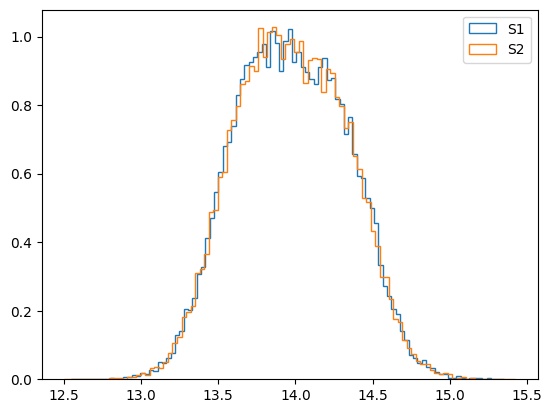

In [26]:
plt.hist(S1, 100, density=True, histtype='step', label='S1')
plt.hist(S2, 100, density=True, histtype='step', label='S2')
plt.legend()
plt.show()

This time the empirical distribution functions really look similar.

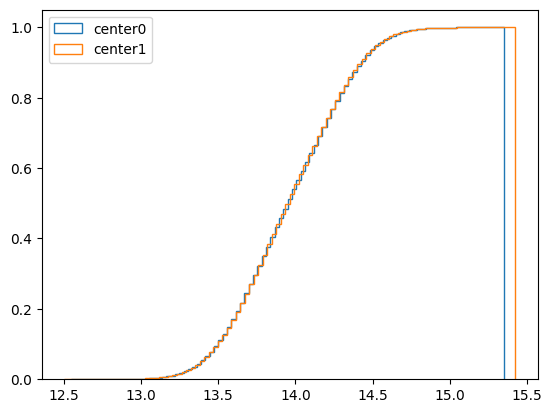

In [27]:
#TODO 
#plot cummulative distribution functions, use the same code as before



And this time the empirical cummulative functions look identical as well.

Let us also have a look at Kolmogorov-Smirnov test.

In [28]:
scipy.stats.kstest(S1,S2)

KstestResult(statistic=0.006866666666666688, pvalue=0.4770160007255947)

This time we cannot reject the hypothesis that the distributions from which the samples are coming are in fact different. 
Which makes sense.